In [ ]:
pip install matplotlib seaborn bokeh

In [ ]:
pip install tensorflow pandas

In [ ]:
# Importing from tensorflow and keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras import utils
from tensorflow import dtypes, tensordot
from tensorflow import convert_to_tensor, linalg, transpose
# For math operations
import numpy as np
# For plotting with matplotlib
import matplotlib.pyplot as plt
# For plotting with seaborn
import seaborn as sns
# For plotting with bokeh
from bokeh.plotting import figure, show
from bokeh.models import Legend, LegendItem
# For pandas dataframe
import pandas as pd

In [ ]:
...
# load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Shape of training data
total_examples, img_length, img_width = x_train.shape
# Print the statistics
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)

11490434/11490434 [==============================] - 0s 0us/step
Training data has  18623 images
Each image is of size  28 x 28


Figures in matplotlib

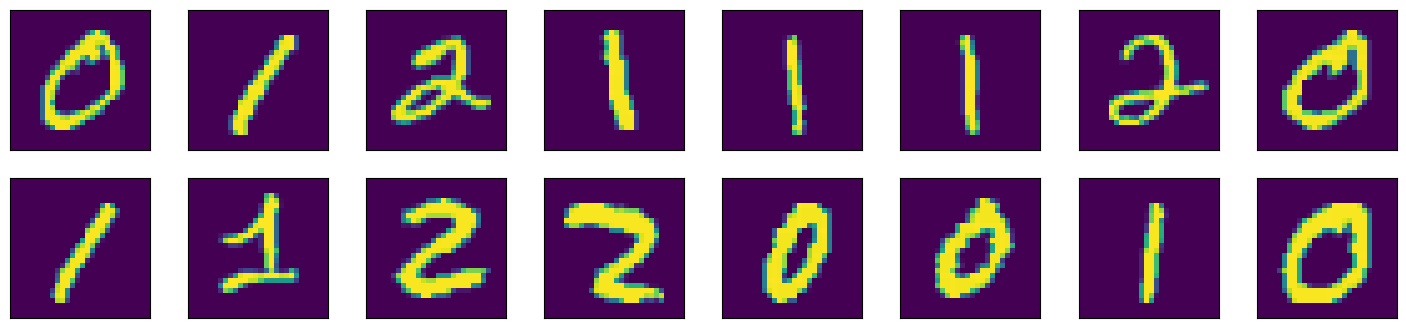

In [ ]:
img_per_row = 8
fig,ax = plt.subplots(nrows=2, ncols=img_per_row,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))
for row in [0, 1]:
    for col in range(img_per_row):
        ax[row, col].imshow(x_train[row*img_per_row + col].astype('int'))
plt.show()

In [ ]:
Scatter Plots in matplotlib and Seaborn

In [ ]:
...
# Convert the dataset into a 2D array of shape 18623 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)

3 largest eigenvalues:  tf.Tensor([5.1999642e+09 1.1419439e+10 4.8231231e+10], shape=(3,), dtype=float32)


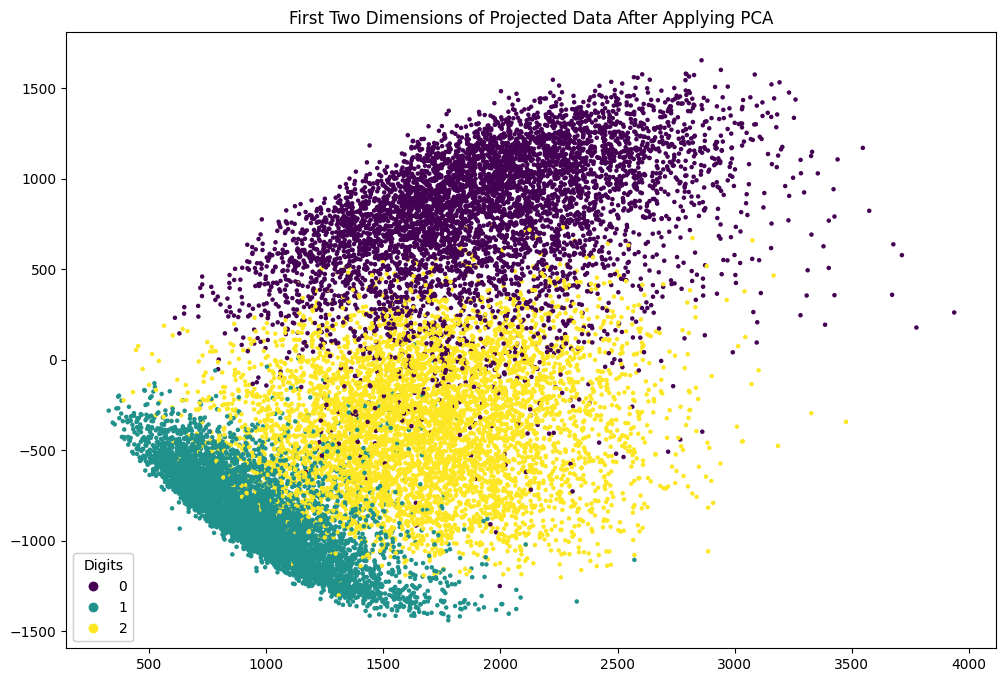

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(x_pca[:, -1], x_pca[:, -2], c=train_labels, s=5)
legend_plt = ax.legend(*scatter.legend_elements(),
                       loc="lower left", title="Digits")
ax.add_artist(legend_plt)
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()

Training data has  18623 images
Each image is of size  28 x 28
3 largest eigenvalues:  tf.Tensor([5.1999642e+09 1.1419439e+10 4.8231231e+10], shape=(3,), dtype=float32)


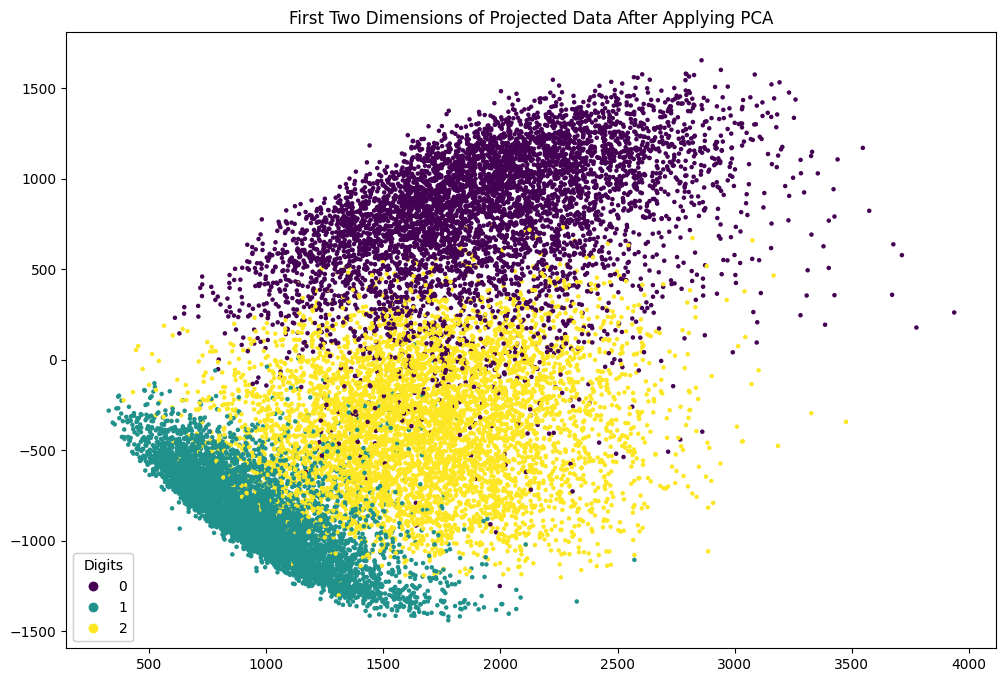

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import dtypes, tensordot
from tensorflow import convert_to_tensor, linalg, transpose
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train.shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)

# Convert the dataset into a 2D array of shape 18623 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(x_pca[:, -1], x_pca[:, -2], c=train_labels, s=5)
legend_plt = ax.legend(*scatter.legend_elements(),
                       loc="lower left", title="Digits")
ax.add_artist(legend_plt)
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()

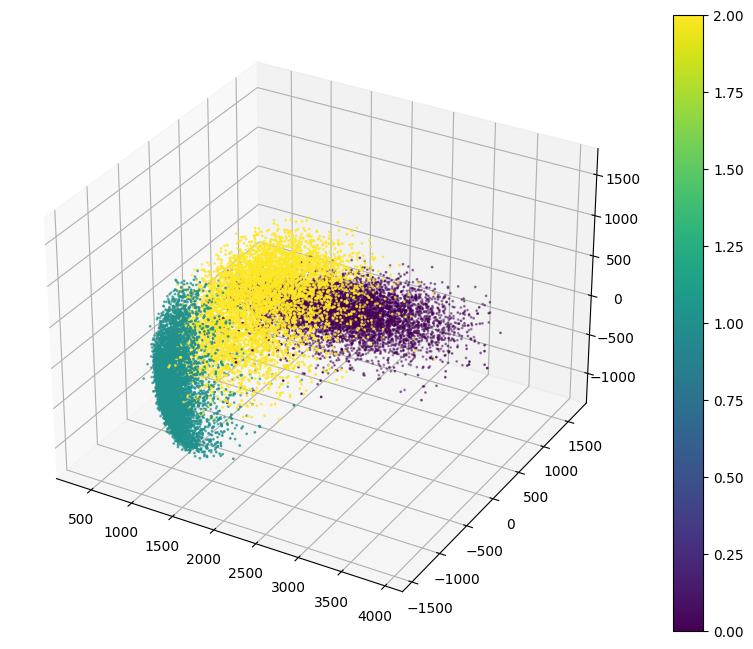

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
plt_3d = ax.scatter3D(x_pca[:, -1], x_pca[:, -2], x_pca[:, -3], c=train_labels, s=1)
plt.colorbar(plt_3d)
plt.show()

In [ ]:
ax.view_init(elev=30, azim=-60)

Training data has  18623 images
Each image is of size  28 x 28
3 largest eigenvalues:  tf.Tensor([5.1999642e+09 1.1419439e+10 4.8231231e+10], shape=(3,), dtype=float32)


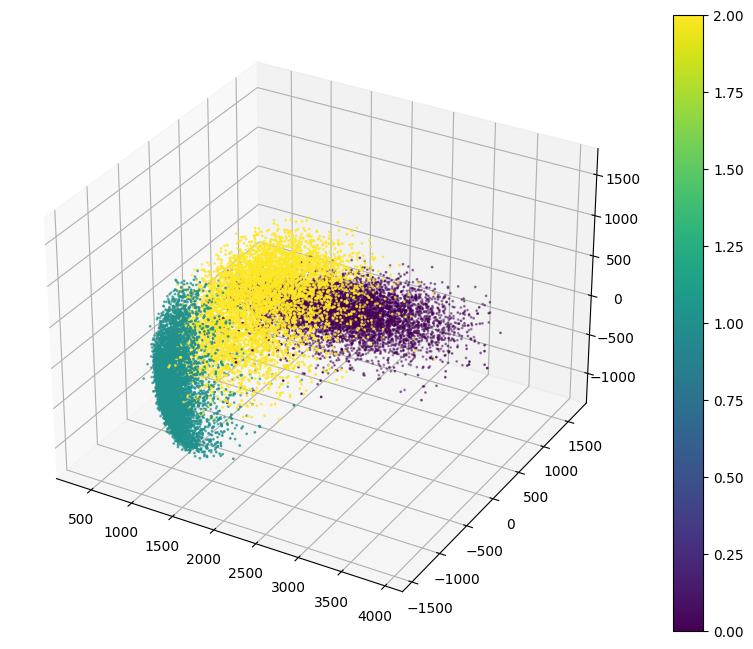

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import dtypes, tensordot
from tensorflow import convert_to_tensor, linalg, transpose
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train.shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)

# Convert the dataset into a 2D array of shape 18623 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)

# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=-60)
plt_3d = ax.scatter3D(x_pca[:, -1], x_pca[:, -2], x_pca[:, -3], c=train_labels, s=1)
plt.colorbar(plt_3d)
plt.show()

In [ ]:
ax.view_init(elev=30, azim=-60)

Training data has  18623 images
Each image is of size  28 x 28
3 largest eigenvalues:  tf.Tensor([5.1999642e+09 1.1419439e+10 4.8231231e+10], shape=(3,), dtype=float32)


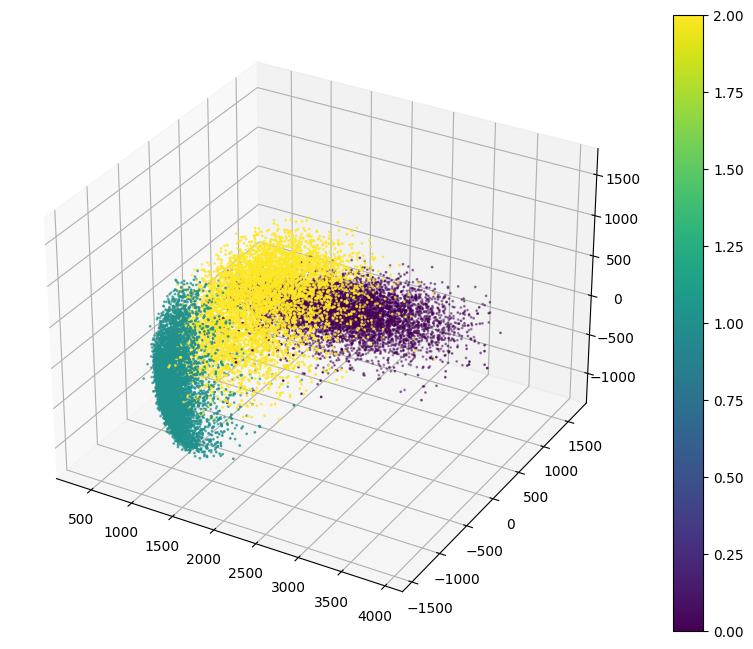

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import dtypes, tensordot
from tensorflow import convert_to_tensor, linalg, transpose
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train.shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)

# Convert the dataset into a 2D array of shape 18623 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)

# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=-60)
plt_3d = ax.scatter3D(x_pca[:, -1], x_pca[:, -2], x_pca[:, -3], c=train_labels, s=1)
plt.colorbar(plt_3d)
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 3 keyword-only arguments) were given

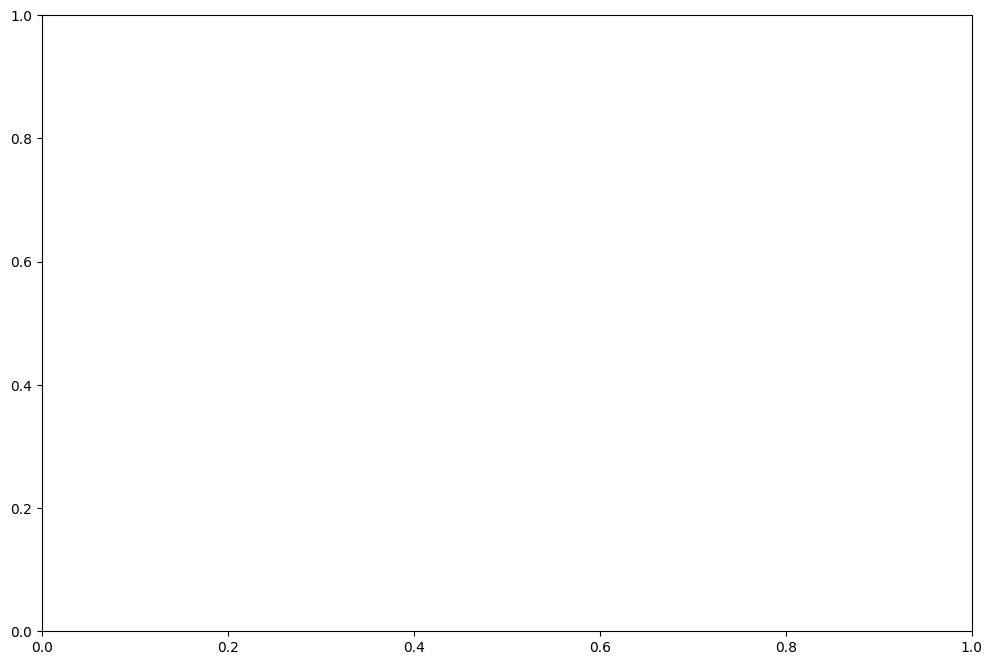

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x_pca[:, -1], x_pca[:, -2],
                style=train_labels, hue=train_labels,
                palette=["red", "green", "blue"])
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()

In [ ]:
sns.set(style = "darkgrid")

In [ ]:
df_mnist = pd.DataFrame(x_pca[:, -3:].numpy(), columns=["pca3","pca2","pca1"])
df_mnist["label"] = train_labels
print(df_mnist)

             pca3        pca2         pca1  label
0     -537.730103  926.885254  1965.881592      0
1      167.375885 -947.360107  1070.359375      1
2      553.685425 -163.121826  1754.754272      2
3     -642.905579 -767.283020  1053.937988      1
4     -651.812988 -586.034424   662.468201      1
...           ...         ...          ...    ...
18618  415.358948 -645.245972   853.439209      1
18619  754.555786    7.873116  1897.690552      2
18620 -321.809357  665.038086  1840.480225      0
18621  643.843628  -85.524895  1113.795166      2
18622   94.964279 -549.570984   561.743042      1

[18623 rows x 4 columns]


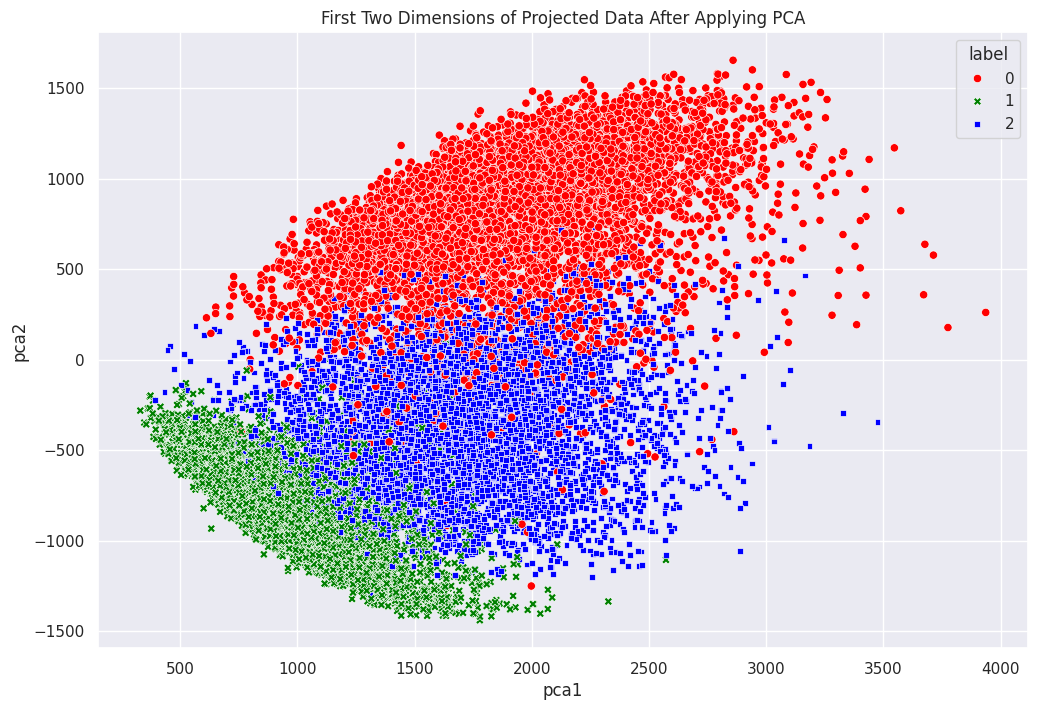

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df_mnist, x="pca1", y="pca2",
                style="label", hue="label",
                palette=["red", "green", "blue"])
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()

Training data has  18623 images
Each image is of size  28 x 28
3 largest eigenvalues:  tf.Tensor([5.1999642e+09 1.1419439e+10 4.8231231e+10], shape=(3,), dtype=float32)


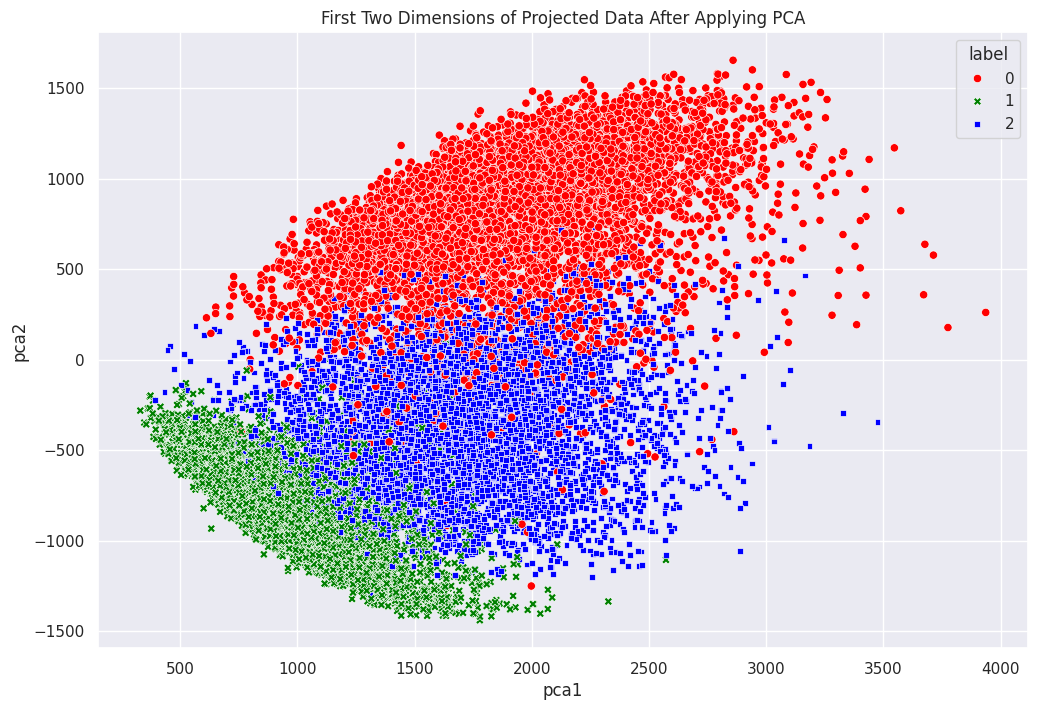

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import dtypes, tensordot
from tensorflow import convert_to_tensor, linalg, transpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train.shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)

# Convert the dataset into a 2D array of shape 18623 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)

# Making pandas DataFrame
df_mnist = pd.DataFrame(x_pca[:, -3:].numpy(), columns=["pca3","pca2","pca1"])
df_mnist["label"] = train_labels

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df_mnist, x="pca1", y="pca2",
                style="label", hue="label",
                palette=["red", "green", "blue"])
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()

Scatter Plots in Bokeh

In [ ]:
colormap = {0: "red", 1:"green", 2:"blue"}
my_scatter = figure(title="First Two Dimensions of Projected Data After Applying PCA",
                    x_axis_label="Dimension 1",
                    y_axis_label="Dimension 2")
for digit in [0, 1, 2]:
    selection = x_pca[train_labels == digit]
    my_scatter.scatter(selection[:,-1].numpy(), selection[:,-2].numpy(),
                       color=colormap[digit], size=5,
                       legend_label="Digit "+str(digit))
my_scatter.legend.click_policy = "hide"
show(my_scatter)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import dtypes, tensordot
from tensorflow import convert_to_tensor, linalg, transpose
import numpy as np
from bokeh.plotting import figure, show

# Load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train.shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)

# Convert the dataset into a 2D array of shape 18623 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)

# Create scatter plot in Bokeh
colormap = {0: "red", 1:"green", 2:"blue"}
my_scatter = figure(title="First Two Dimensions of Projected Data After Applying PCA",
                    x_axis_label="Dimension 1",
                    y_axis_label="Dimension 2")
for digit in [0, 1, 2]:
    selection = x_pca[train_labels == digit]
    my_scatter.scatter(selection[:,-1].numpy(), selection[:,-2].numpy(),
                       color=colormap[digit], size=5, alpha=0.5,
                       legend_label="Digit "+str(digit))
my_scatter.legend.click_policy = "hide"
show(my_scatter)

Training data has  18623 images
Each image is of size  28 x 28
3 largest eigenvalues:  tf.Tensor([5.1999642e+09 1.1419439e+10 4.8231231e+10], shape=(3,), dtype=float32)


In [ ]:
colormap = {0: "red", 1:"green", 2:"blue"}
colors = [colormap[i] for i in train_labels]
my_scatter = figure(title="First Two Dimensions of Projected Data After Applying PCA",
           x_axis_label="Dimension 1", y_axis_label="Dimension 2")
scatter_obj = my_scatter.scatter(x_pca[:, -1].numpy(), x_pca[:, -2].numpy(), color=colors, size=5)
legend = Legend(items=[
    LegendItem(label="Digit 0", renderers=[scatter_obj], index=0),
    LegendItem(label="Digit 1", renderers=[scatter_obj], index=1),
    LegendItem(label="Digit 2", renderers=[scatter_obj], index=2),
    ])
my_scatter.add_layout(legend)
my_scatter.legend.click_policy = "hide"
show(my_scatter)

Preparation of Line Plot Ddata

In [ ]:
epochs = 10
y_train = utils.to_categorical(train_labels)
input_dim = img_length*img_width
# Create a Sequential model
model = Sequential()
# First layer for reshaping input images from 2D to 1D
model.add(Reshape((input_dim, ), input_shape=(img_length, img_width)))
# Dense layer of 8 neurons
model.add(Dense(8, activation='relu'))
# Output layer
model.add(Dense(total_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=epochs, batch_size=10, verbose=0)
print('Learning history: ', history.history)

Learning history:  {'loss': [0.9647443294525146, 0.2821246087551117, 0.18914781510829926, 0.15984050929546356, 0.099223293364048, 0.08876268565654755, 0.07229321449995041, 0.06559710204601288, 0.06070631742477417, 0.06694337725639343], 'accuracy': [0.8370602130889893, 0.9382063150405884, 0.9602468609809875, 0.9677005410194397, 0.9819667935371399, 0.981325626373291, 0.9840506315231323, 0.9838101863861084, 0.9862948060035706, 0.9859741926193237], 'val_loss': [0.44277000427246094, 0.2588269114494324, 0.19870369136333466, 0.2269708514213562, 0.10305697470903397, 0.08298398554325104, 0.0867612287402153, 0.08640795201063156, 0.0801796019077301, 0.10005371272563934], 'val_accuracy': [0.9422388672828674, 0.9266189336776733, 0.9459811449050903, 0.9772209525108337, 0.981776773929596, 0.9814513325691223, 0.980637788772583, 0.980637788772583, 0.980637788772583, 0.9781972169876099]}


Line Plots in matplotlib, Seaborn, and Bokeh

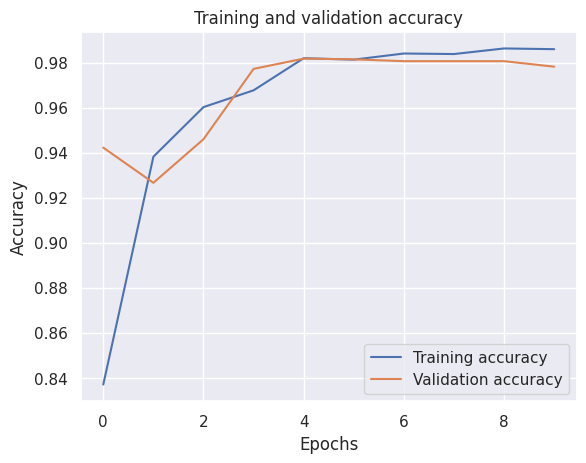

In [ ]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training data has  18623 images
Each image is of size  28 x 28
Learning history:  {'loss': [0.66754150390625, 0.14340704679489136, 0.08158840239048004, 0.07962477207183838, 0.07000013440847397, 0.05201967433094978, 0.06581083685159683, 0.04764533415436745, 0.03748687729239464, 0.03659147396683693], 'accuracy': [0.9080708622932434, 0.9734711647033691, 0.9787608981132507, 0.9821271300315857, 0.9834896326065063, 0.9871764183044434, 0.9854933023452759, 0.9873366951942444, 0.9895808100700378, 0.9899014234542847], 'val_loss': [0.17311391234397888, 0.14619529247283936, 0.07675393670797348, 0.08480042219161987, 0.06540185958147049, 0.11870889365673065, 0.061856143176555634, 0.07345131784677505, 0.06419385969638824, 0.07162843644618988], 'val_accuracy': [0.9697363972663879, 0.9580214619636536, 0.9829156994819641, 0.9835665225982666, 0.9856817722320557, 0.9773836731910706, 0.984054684638977, 0.9819394946098328, 0.9861698746681213, 0.9848682284355164]}


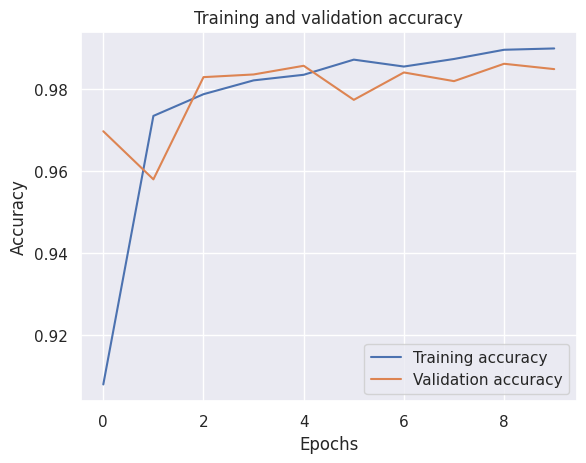

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train.shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)

# Prepare for classifier network
epochs = 10
y_train = utils.to_categorical(train_labels)
input_dim = img_length*img_width
# Create a Sequential model
model = Sequential()
# First layer for reshaping input images from 2D to 1D
model.add(Reshape((input_dim, ), input_shape=(img_length, img_width)))
# Dense layer of 8 neurons
model.add(Dense(8, activation='relu'))
# Output layer
model.add(Dense(total_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=epochs, batch_size=10, verbose=0)
print('Learning history: ', history.history)

# Plot accuracy in Matplotlib
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

       loss  accuracy  val_loss  val_accuracy
0  0.667542  0.908071  0.173114      0.969736
1  0.143407  0.973471  0.146195      0.958021
2  0.081588  0.978761  0.076754      0.982916
3  0.079625  0.982127  0.084800      0.983567
4  0.070000  0.983490  0.065402      0.985682
5  0.052020  0.987176  0.118709      0.977384
6  0.065811  0.985493  0.061856      0.984055
7  0.047645  0.987337  0.073451      0.981939
8  0.037487  0.989581  0.064194      0.986170
9  0.036591  0.989901  0.071628      0.984868


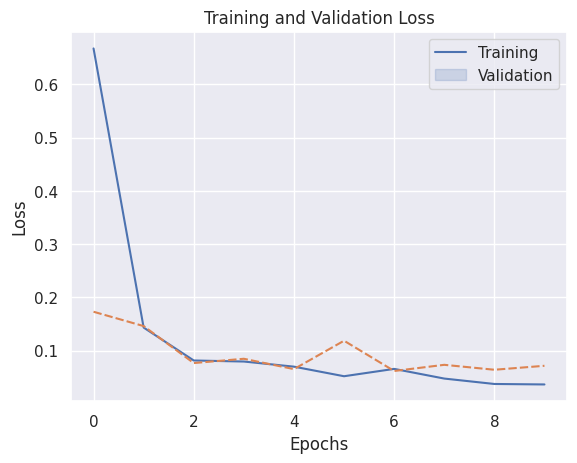

In [ ]:
# Create pandas DataFrame
df_history = pd.DataFrame(history.history)
print(df_history)

# Plot using Seaborn
my_plot = sns.lineplot(data=df_history[["loss","val_loss"]])
my_plot.set_xlabel('Epochs')
my_plot.set_ylabel('Loss')
plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()

The Complete code of producing the plot in Saborn

Training data has  18623 images
Each image is of size  28 x 28
       loss  accuracy  val_loss  val_accuracy
0  0.865103  0.869520  0.230254      0.936707
1  0.185707  0.934840  0.180523      0.945005
2  0.141362  0.957602  0.164295      0.946307
3  0.113139  0.967781  0.124938      0.979173
4  0.109244  0.971467  0.080392      0.975431
5  0.062697  0.982528  0.090987      0.982102
6  0.063177  0.984211  0.088280      0.984380
7  0.064712  0.985573  0.098561      0.982916
8  0.060910  0.985573  0.062440      0.984055
9  0.052722  0.986856  0.064991      0.983892


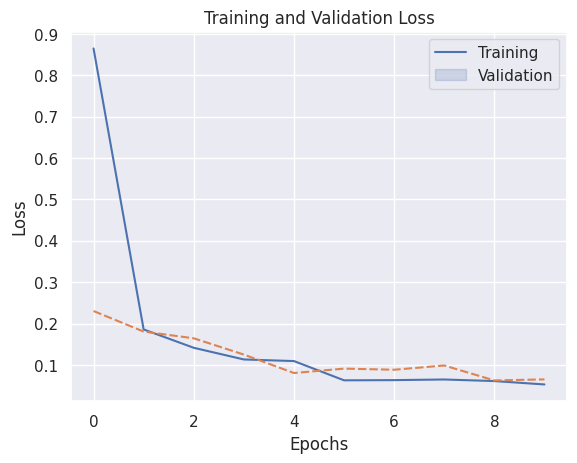

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train.shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)

# Prepare for classifier network
epochs = 10
y_train = utils.to_categorical(train_labels)
input_dim = img_length*img_width
# Create a Sequential model
model = Sequential()
# First layer for reshaping input images from 2D to 1D
model.add(Reshape((input_dim, ), input_shape=(img_length, img_width)))
# Dense layer of 8 neurons
model.add(Dense(8, activation='relu'))
# Output layer
model.add(Dense(total_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=epochs, batch_size=10, verbose=0)

# Prepare pandas DataFrame
df_history = pd.DataFrame(history.history)
print(df_history)

# Plot loss in seaborn
my_plot = sns.lineplot(data=df_history[["loss","val_loss"]])
my_plot.set_xlabel('Epochs')
my_plot.set_ylabel('Loss')
plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
p = figure(title="Training and validation accuracy",
           x_axis_label="Epochs", y_axis_label="Accuracy")
epochs_array = np.arange(epochs)
p.line(epochs_array, df_history['accuracy'], legend_label="Training",
       color="blue", line_width=2)
p.line(epochs_array, df_history['val_accuracy'], legend_label="Validation",
       color="green")
p.legend.click_policy = "hide"
p.legend.location = 'bottom_right'
show(p)

The Complete code for making Bokeh Plot

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show

# Load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train.shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)

# Prepare for classifier network
epochs = 10
y_train = utils.to_categorical(train_labels)
input_dim = img_length*img_width
# Create a Sequential model
model = Sequential()
# First layer for reshaping input images from 2D to 1D
model.add(Reshape((input_dim, ), input_shape=(img_length, img_width)))
# Dense layer of 8 neurons
model.add(Dense(8, activation='relu'))
# Output layer
model.add(Dense(total_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=epochs, batch_size=10, verbose=0)

# Prepare pandas DataFrame
df_history = pd.DataFrame(history.history)
print(df_history)

# Plot accuracy in Bokeh
p = figure(title="Training and validation accuracy",
           x_axis_label="Epochs", y_axis_label="Accuracy")
epochs_array = np.arange(epochs)
p.line(epochs_array, df_history['accuracy'], legend_label="Training",
       color="blue", line_width=2)
p.line(epochs_array, df_history['val_accuracy'], legend_label="Validation",
       color="green")
p.legend.click_policy = "hide"
p.legend.location = 'bottom_right'
show(p)

Training data has  18623 images
Each image is of size  28 x 28
       loss  accuracy  val_loss  val_accuracy
0  1.099392  0.893805  0.320111      0.826066
1  0.207181  0.937164  0.160436      0.949723
2  0.152685  0.956640  0.142205      0.961113
3  0.114778  0.966899  0.094297      0.968272
4  0.093606  0.970345  0.131590      0.969248
5  0.073833  0.972029  0.080824      0.981451
6  0.089618  0.968262  0.072037      0.971363
7  0.062441  0.979562  0.076449      0.982102
8  0.038068  0.983169  0.095044      0.984868
9  0.049346  0.980925  0.126505      0.978848


 to create a side-by-side visualization in matplotlib, where one of them is created using Seaborn:



Training data has  18623 images
Each image is of size  28 x 28
3 largest eigenvalues:  tf.Tensor([5.1999642e+09 1.1419439e+10 4.8231231e+10], shape=(3,), dtype=float32)
       loss  accuracy  val_loss  val_accuracy
0  0.761635  0.916005  0.207228      0.974455
1  0.132922  0.976998  0.126157      0.974455
2  0.121871  0.974994  0.097613      0.980475
3  0.095646  0.979963  0.098461      0.982265
4  0.074848  0.983329  0.099032      0.978848
5  0.063539  0.987016  0.092848      0.980312
6  0.065445  0.985654  0.071157      0.984217
7  0.048657  0.988619  0.068747      0.986007
8  0.061939  0.987337  0.088488      0.985682
9  0.038454  0.991344  0.062325      0.984380


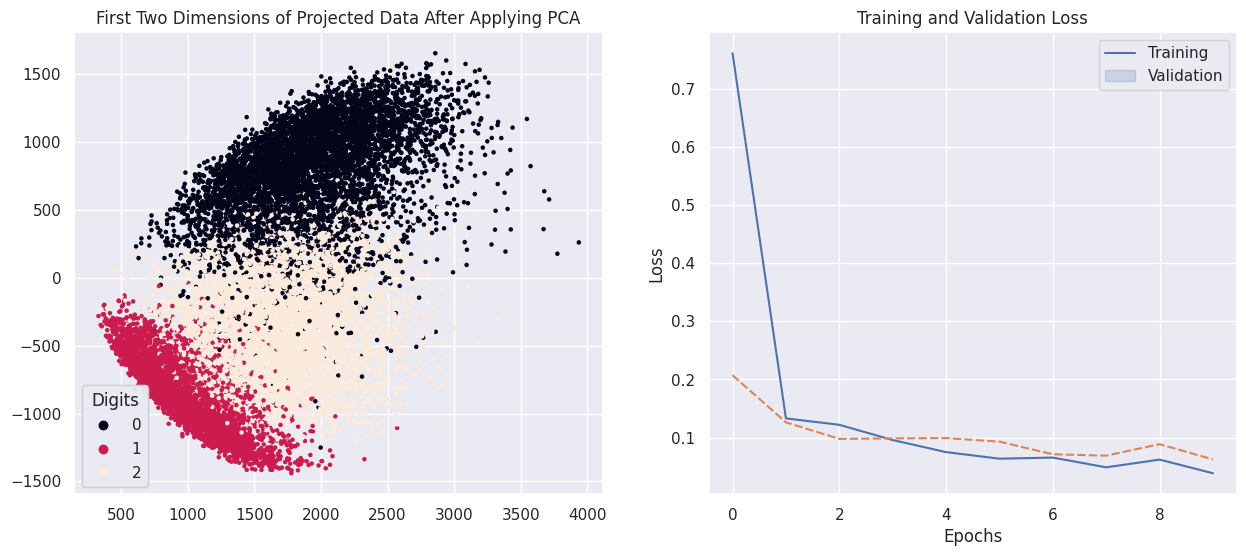

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow import dtypes, tensordot
from tensorflow import convert_to_tensor, linalg, transpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train.shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)


# Convert the dataset into a 2D array of shape 18623 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)


# Prepare for classifier network
epochs = 10
y_train = utils.to_categorical(train_labels)
input_dim = img_length*img_width
# Create a Sequential model
model = Sequential()
# First layer for reshaping input images from 2D to 1D
model.add(Reshape((input_dim, ), input_shape=(img_length, img_width)))
# Dense layer of 8 neurons
model.add(Dense(8, activation='relu'))
# Output layer
model.add(Dense(total_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=epochs, batch_size=10, verbose=0)


# Prepare pandas DataFrame
df_history = pd.DataFrame(history.history)
print(df_history)


# Plot side-by-side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
# left plot
scatter = ax[0].scatter(x_pca[:, -1], x_pca[:, -2], c=train_labels, s=5)
legend_plt = ax[0].legend(*scatter.legend_elements(),
                         loc="lower left", title="Digits")
ax[0].add_artist(legend_plt)
ax[0].set_title('First Two Dimensions of Projected Data After Applying PCA')
# right plot
my_plot = sns.lineplot(data=df_history[["loss","val_loss"]], ax=ax[1])
my_plot.set_xlabel('Epochs')
my_plot.set_ylabel('Loss')
ax[1].legend(labels=["Training", "Validation"])
ax[1].set_title('Training and Validation Loss')
plt.show()

The equivalent in Bokeh is to create each subplot separately and then specify the layout when we show it:

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow import dtypes, tensordot
from tensorflow import convert_to_tensor, linalg, transpose
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.layouts import row

# Load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train.shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)


# Convert the dataset into a 2D array of shape 18623 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)


# Prepare for classifier network
epochs = 10
y_train = utils.to_categorical(train_labels)
input_dim = img_length*img_width
# Create a Sequential model
model = Sequential()
# First layer for reshaping input images from 2D to 1D
model.add(Reshape((input_dim, ), input_shape=(img_length, img_width)))
# Dense layer of 8 neurons
model.add(Dense(8, activation='relu'))
# Output layer
model.add(Dense(total_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=epochs, batch_size=10, verbose=0)


# Prepare pandas DataFrame
df_history = pd.DataFrame(history.history)
print(df_history)


# Create scatter plot in Bokeh
colormap = {0: "red", 1:"green", 2:"blue"}
my_scatter = figure(title="First Two Dimensions of Projected Data After Applying PCA",
                    x_axis_label="Dimension 1",
                    y_axis_label="Dimension 2",
                    width=500, height=400)
for digit in [0, 1, 2]:
    selection = x_pca[train_labels == digit]
    my_scatter.scatter(selection[:,-1].numpy(), selection[:,-2].numpy(),
                       color=colormap[digit], size=5, alpha=0.5,
                       legend_label="Digit "+str(digit))
my_scatter.legend.click_policy = "hide"


# Plot accuracy in Bokeh
p = figure(title="Training and validation accuracy",
           x_axis_label="Epochs", y_axis_label="Accuracy",
           width=500, height=400)
epochs_array = np.arange(epochs)
p.line(epochs_array, df_history['accuracy'], legend_label="Training",
       color="blue", line_width=2)
p.line(epochs_array, df_history['val_accuracy'], legend_label="Validation",
       color="green")
p.legend.click_policy = "hide"
p.legend.location = 'bottom_right'

show(row(my_scatter, p))

Training data has  18623 images
Each image is of size  28 x 28
3 largest eigenvalues:  tf.Tensor([5.1999642e+09 1.1419439e+10 4.8231231e+10], shape=(3,), dtype=float32)
       loss  accuracy  val_loss  val_accuracy
0  1.203943  0.923700  0.301329      0.912463
1  0.205438  0.950469  0.194371      0.961276
2  0.158373  0.963292  0.146822      0.968435
3  0.115163  0.969063  0.136873      0.979499
4  0.147720  0.971948  0.098547      0.979011
5  0.071311  0.979883  0.157534      0.958835
6  0.107059  0.978681  0.114903      0.982265
7  0.073819  0.982528  0.092431      0.982753
8  0.075361  0.982768  0.127380      0.978848
9  0.061434  0.985253  0.143108      0.983404
